Q24: How clear is it that students' feedback on the course is acted on?
Q25: How well does the students' union (association or guild) represent students' academic interests?
Q14: How often does feedback help you to improve your work?
Q17: How well organised is your course?
Q10: How clear were the marking criteria used to assess your work? 
Q18: How well were any changes to teaching on your course communicated?
Q08: To what extent does your course have the right balance of directed and independent study?
Q23: To what extent are students' opinions about the course valued by staff?
Q26: How well communicated was information about your university/college's mental wellbeing support services?
Q28: Overall, I am satisfied with the quality of the course.
Q13: How often have you received assessment feedback on time?
Q02: How often do teaching staff make the subject engaging?
Q11: How fair has the marking and assessment been on your course? 
Q12: How well have assessments allowed you to demonstr

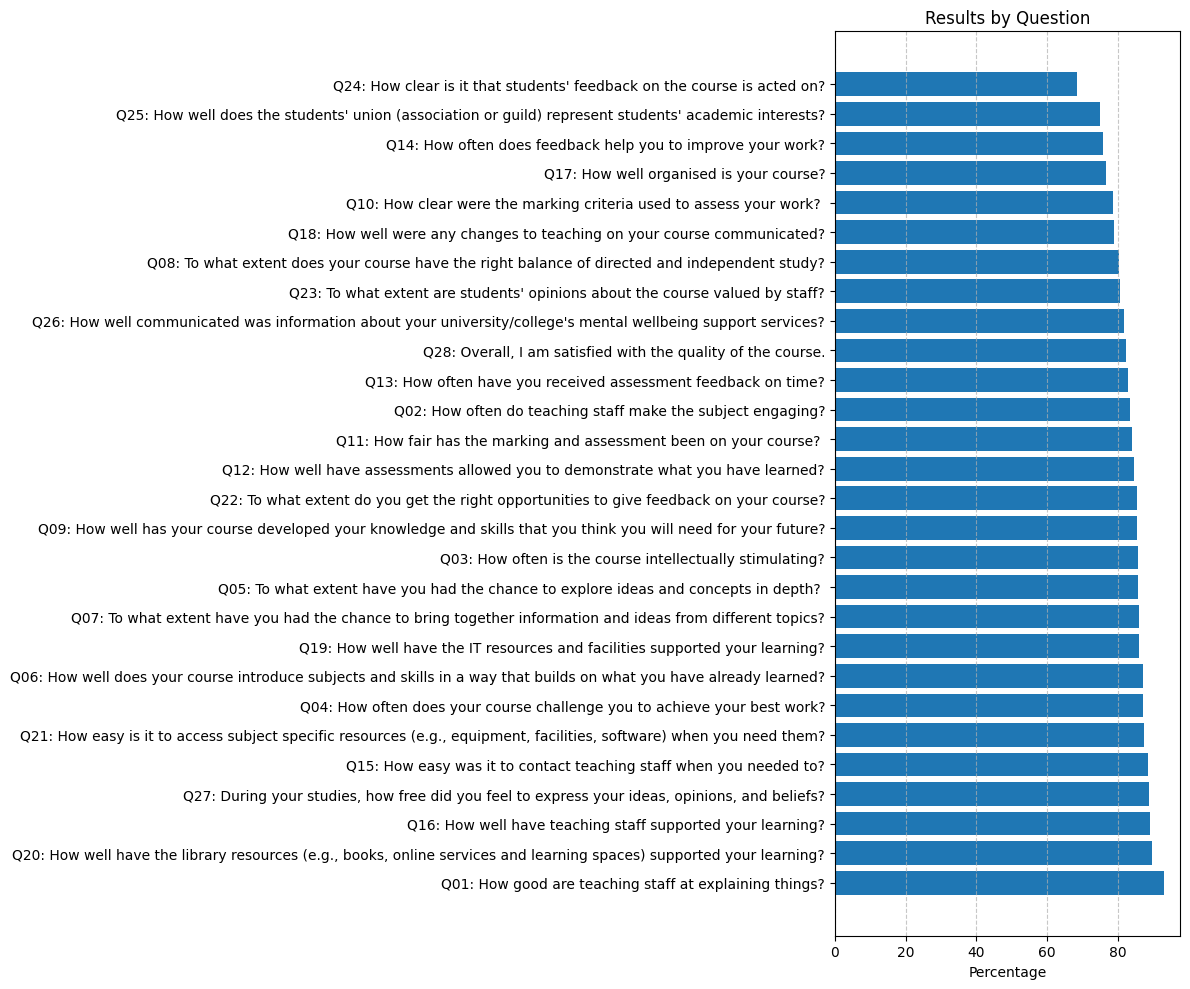

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---
questionToPlot = [] 

answerVaules = []
# Get the list of subjects
totalCha1 = df["cah1_subject"].unique().tolist()

top_10 = (df.groupby('question', as_index=False)
            .agg(mean_agree_pct=('agree_pct', 'mean'))
            .sort_values('mean_agree_pct', ascending=True)
)

    # 3. APPEND to the list
for index, row in top_10.iterrows():
    
                    # The subject name
     
        questionToPlot.append(row['question'])              
        answerVaules.append(row['mean_agree_pct'])   



for x in range(len(top_10)):
    print(questionToPlot[x]) 
# -----------------------------

# --- THE PLOTTING CODE (FIXED) ---



fig, ax = plt.subplots(figsize=(12, 10))

# Use barh for horizontal bars
ax.barh(questionToPlot, answerVaules)

ax.set_xlabel("Percentage")
ax.set_title("Results by Question")
ax.grid(axis='x', linestyle='--', alpha=0.7) # Grid on X axis only
ax.invert_yaxis() # Top question at the top

plt.tight_layout()
plt.show()




plt.show()

Q24: How clear is it that students' feedback on the course is acted on?
Q14: How often does feedback help you to improve your work?
Q25: How well does the students' union (association or guild) represent students' academic interests?
Q17: How well organised is your course?
Q10: How clear were the marking criteria used to assess your work? 
Q08: To what extent does your course have the right balance of directed and independent study?
Q18: How well were any changes to teaching on your course communicated?
Q23: To what extent are students' opinions about the course valued by staff?
Q28: Overall, I am satisfied with the quality of the course.
Q26: How well communicated was information about your university/college's mental wellbeing support services?
Q13: How often have you received assessment feedback on time?
Q02: How often do teaching staff make the subject engaging?
Q11: How fair has the marking and assessment been on your course? 
Q12: How well have assessments allowed you to demonstr

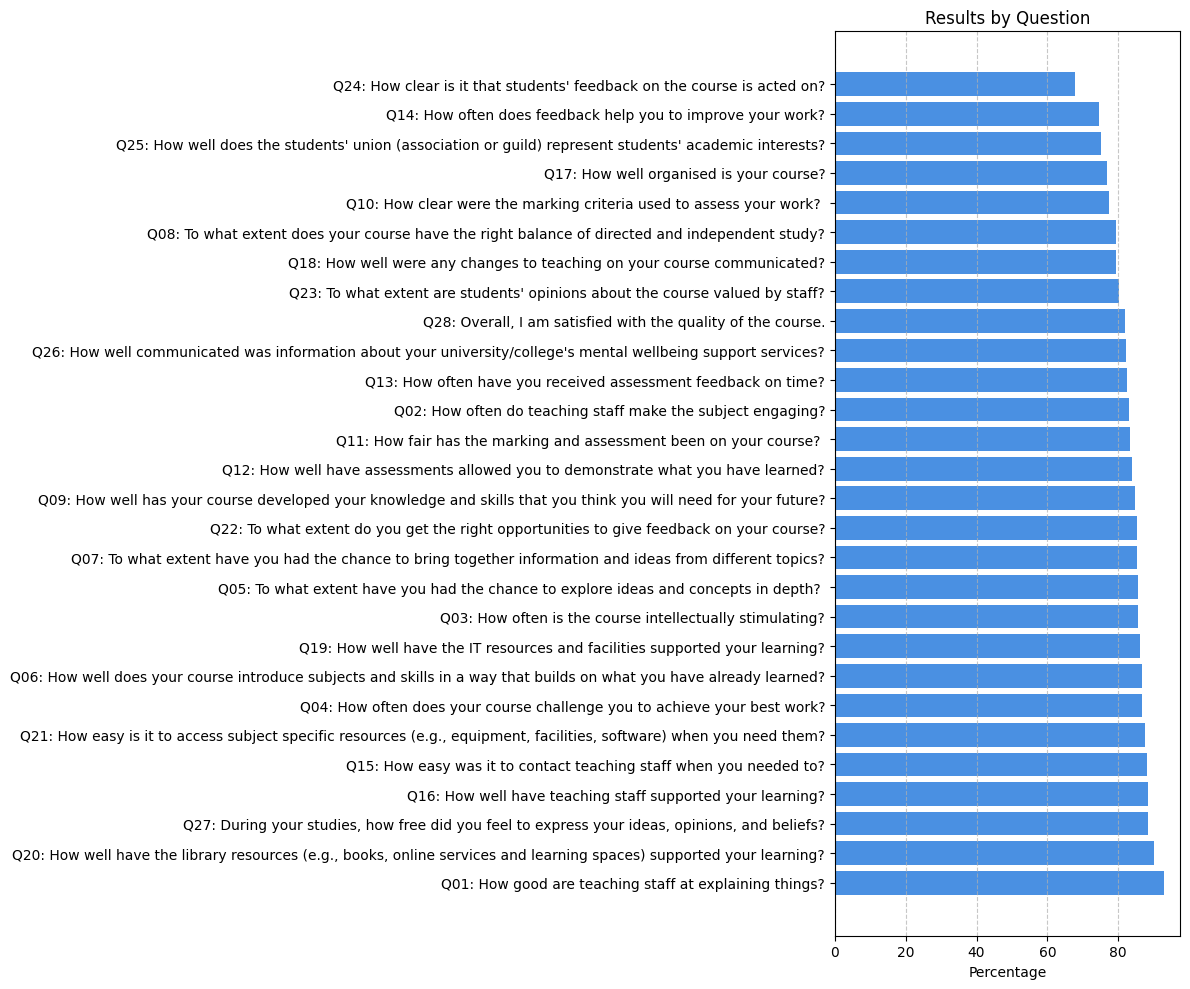

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---
questionToPlot = [] 

answerVaules = []
# Get the list of subjects
totalCha1 = df["cah1_subject"].unique().tolist()

top_10 = (df.groupby('question', as_index=False)
            .agg(mean_agree_pct=('benchmark', 'mean'))
            .sort_values('mean_agree_pct', ascending=True)
)

    # 3. APPEND to the list
for index, row in top_10.iterrows():
    
                    # The subject name
     
        questionToPlot.append(row['question'])              
        answerVaules.append(row['mean_agree_pct'])   



for x in range(len(top_10)):
    print(questionToPlot[x]) 
# -----------------------------

# --- THE PLOTTING CODE (FIXED) ---



fig, ax = plt.subplots(figsize=(12, 10))

# Use barh for horizontal bars
ax.barh(questionToPlot, answerVaules, color='#4a90e2')

ax.set_xlabel("Percentage")
ax.set_title("Results by Question")
ax.grid(axis='x', linestyle='--', alpha=0.7) # Grid on X axis only
ax.invert_yaxis() # Top question at the top

plt.tight_layout()
plt.show()






In [4]:
Q03: How often is the course intellectually stimulating?




Object `stimulating` not found.


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---

total_pop = df['population'].sum()
total_res = df['respondents'].sum()


print((total_res/total_pop)*100)


72.8150541908839


                               provider  population
72        Global Banking School Limited        6867
181     St. Piran's School (GB) Limited        2466
142  Oxford Business College UK Limited        1510
91                   LCA London Limited        1441
74                  Goldsmiths' College        1411
..                                  ...         ...
59                   East Coast College          11
145                              Petroc          11
125        Nazarene Theological College          10
147                    Plumpton College          10
174         South Staffordshire College          10

[217 rows x 2 columns]
Number of providers: 217
54


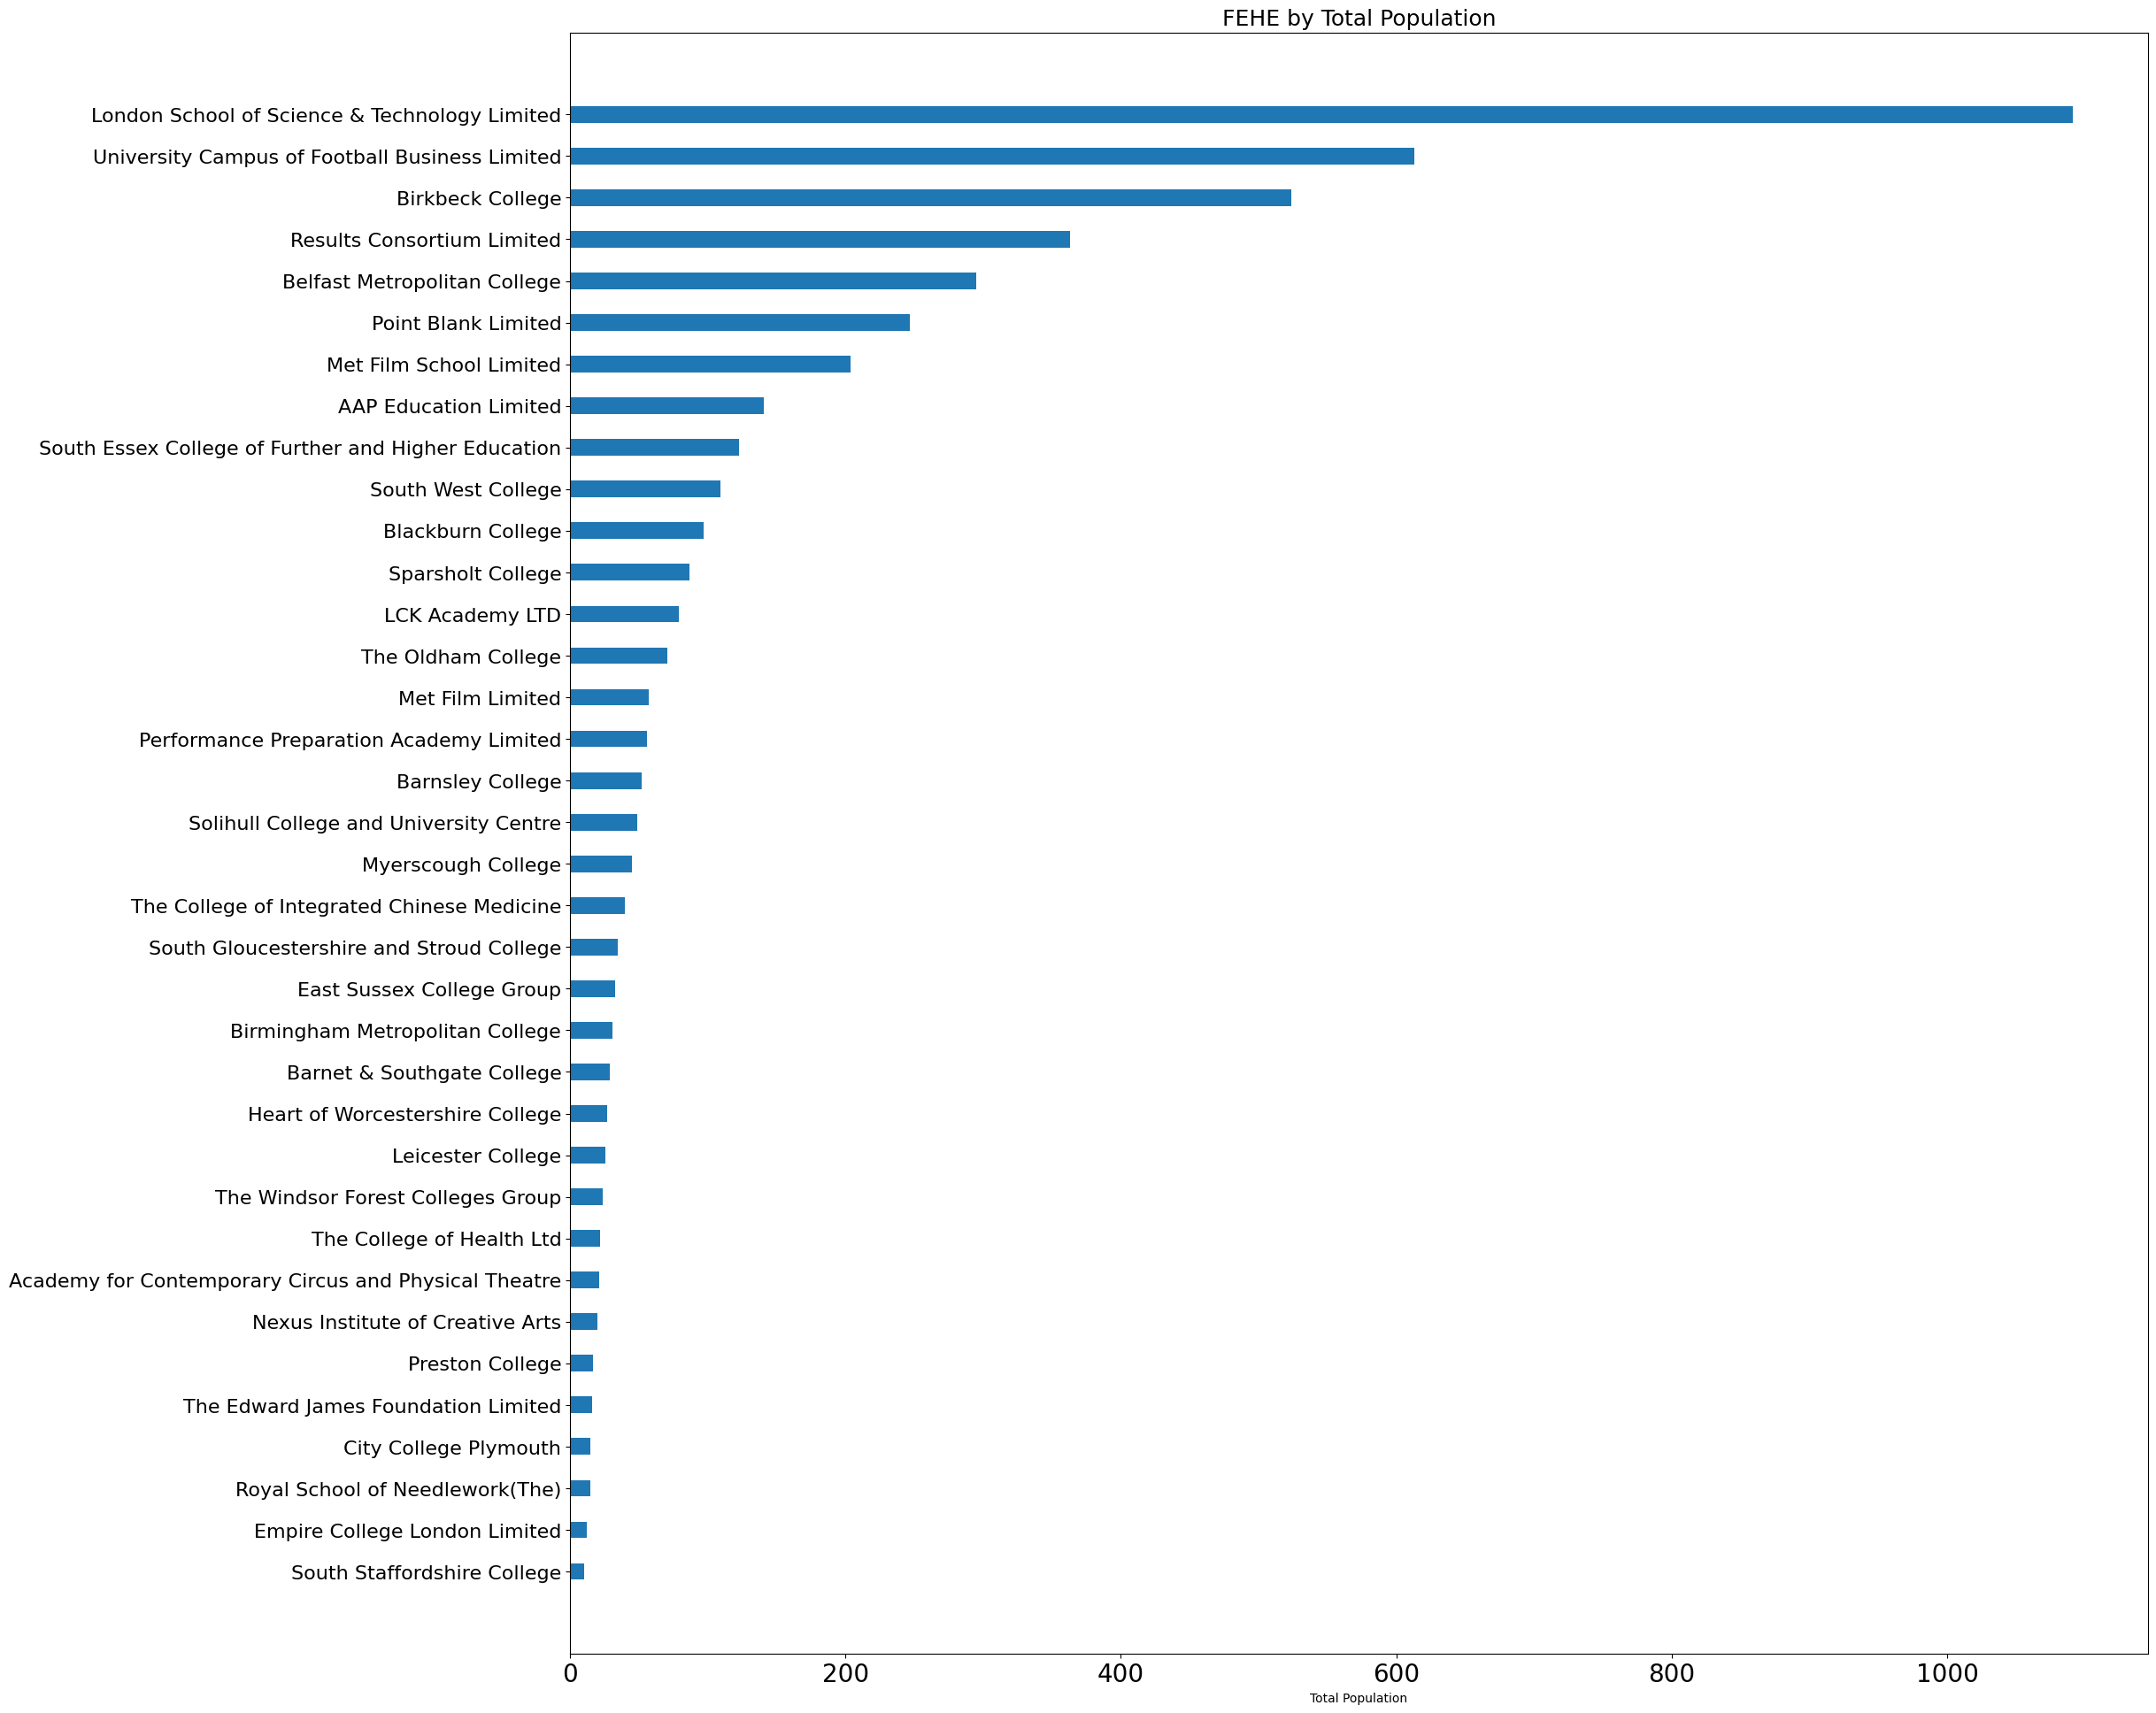

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("FEHE.csv")

# --- DATA PROCESSING ---

subset = df[['provider', 'cah3_subject', 'population']]


unique_df = subset.drop_duplicates(
    subset=['provider', 'cah3_subject', 'population']
)

# 3. Sum population per provider
provider_population = (
    unique_df
    .groupby('provider', as_index=False)['population']
    .sum()
)

# 4. Sort and exclude top 2 online providers, then take top 10
top_10 = (
    provider_population
    .sort_values('population', ascending=False)


)

print(top_10)
print("Number of providers:", len(top_10))  # should be 10


#index delelte

skip = 4
total_thing = int(len(top_10) / skip)

print(total_thing)
top_10 = top_10.iloc[6:]
top_10 = top_10.iloc[::6]



fig_height = max(0.4 * len(top_10), 20)  # auto-scale height

fig, ax = plt.subplots(figsize=(25, fig_height))

ax.barh(
    top_10['provider'],
    top_10['population'],
    height=0.4
)

ax.set_title("FEHE by Total Population", fontsize=18)
ax.set_xlabel("Total Population")
ax.invert_yaxis()

# Improve label readability
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=20)

plt.tight_layout(pad=3)
plt.show()


5338


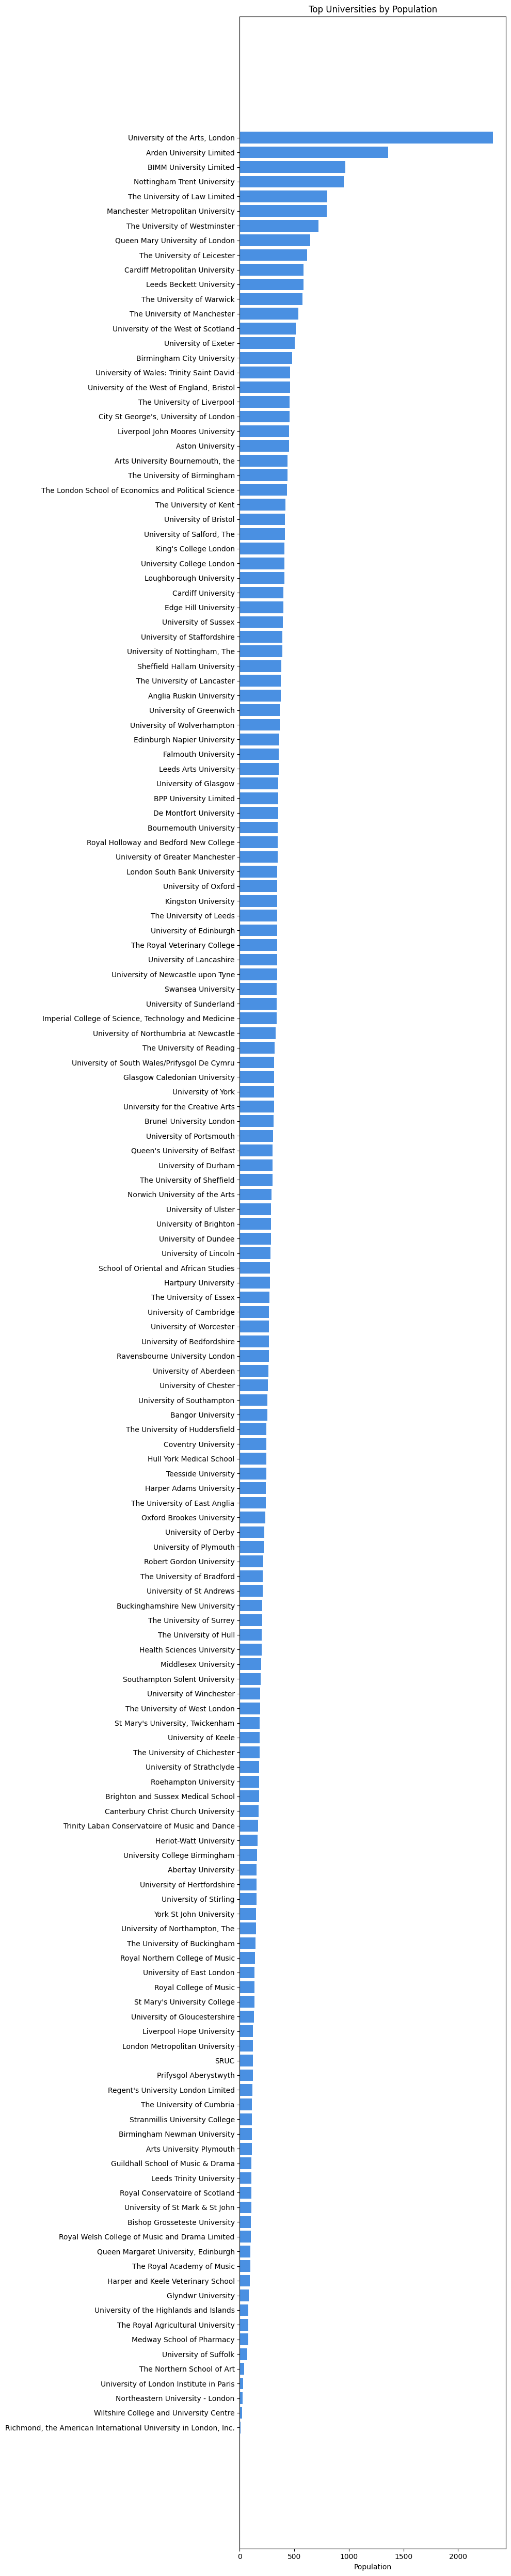

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("onlyUni.csv")

questionToPlot = [] 
answerValues = []

# --- DATA PROCESSING ---

# 1. Select only the columns we need
subset = df[['provider', 'population','cah3_subject']]

# 2. Remove duplicates to make it UNIQUE
# This keeps 1 row per provider with their population
unique_df = subset.drop_duplicates()

# 3. Sort by population and take top 10
top_10 = unique_df.sort_values('population', ascending=False)


# --- LOOP (UNCHANGED) ---
for index, row in top_10.iterrows():
    questionToPlot.append(row['provider'])     
    answerValues.append(row['population'])   

print(len(top_10)) # Should be 10

# --- PLOTTING ---
fig, ax = plt.subplots(figsize=(10, 50))
ax.barh(questionToPlot, answerValues, color='#4a90e2')
plt.title("Top Universities by Population")
ax.set_xlabel("Population")
ax.invert_yaxis()
plt.tight_layout()
plt.show()







# Each providers and the for piplaution and respondence

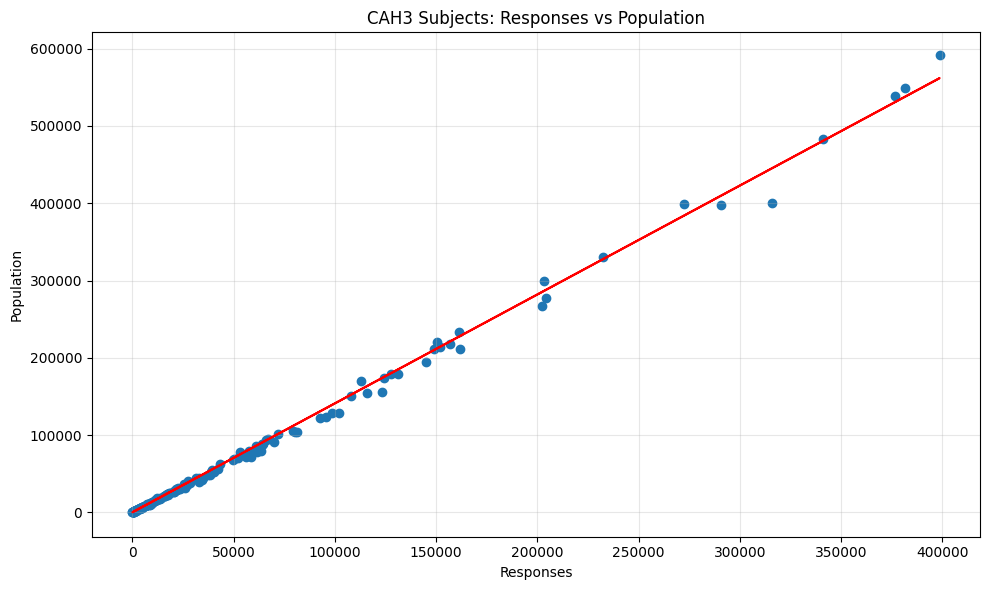

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("nss2025.csv")

# ---- Aggregate by CAH3 subject ----
cah3_summary = (
    df
    .groupby("cah3_subject", as_index=False)
    .agg(
        mean_agree_pct=("benchmark", "mean"),
        population=("population", "sum"),
        responses=("respondents", "sum")
    )
)

# ---- Scatter plot ----
plt.figure(figsize=(10, 6))

plt.scatter(
    cah3_summary["responses"],      # X axis
    cah3_summary["population"],     # Y axis


)

a, b = np.polyfit(cah3_summary["responses"],  cah3_summary["population"], 1)

plt.xlabel("Responses")
plt.ylabel("Population")
plt.title("CAH3 Subjects: Responses vs Population")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.plot(cah3_summary["responses"], a*cah3_summary["responses"],+b ,color='red') 
plt.show()


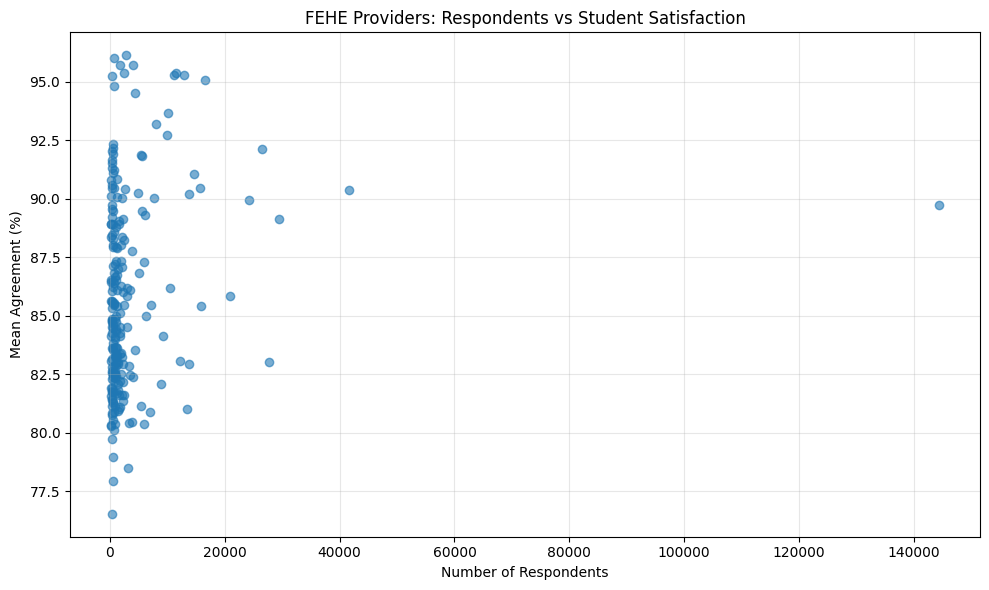

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("FEHE.csv")

# ---- Aggregate by provider ----
provider_summary = (
    df
    .groupby("provider", as_index=False)
    .agg(
        mean_agree_pct=("benchmark", "mean"),
        respondents=("respondents", "sum"),
        population=("population", "sum")
    )
)



# ---- Scatter plot ----
plt.figure(figsize=(10, 6))

plt.scatter(
    provider_summary["respondents"],      # X
    provider_summary["mean_agree_pct"],    # Y
    alpha=0.6
)

plt.xlabel("Number of Respondents")
plt.ylabel("Mean Agreement (%)")
plt.title("FEHE Providers: Respondents vs Student Satisfaction")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


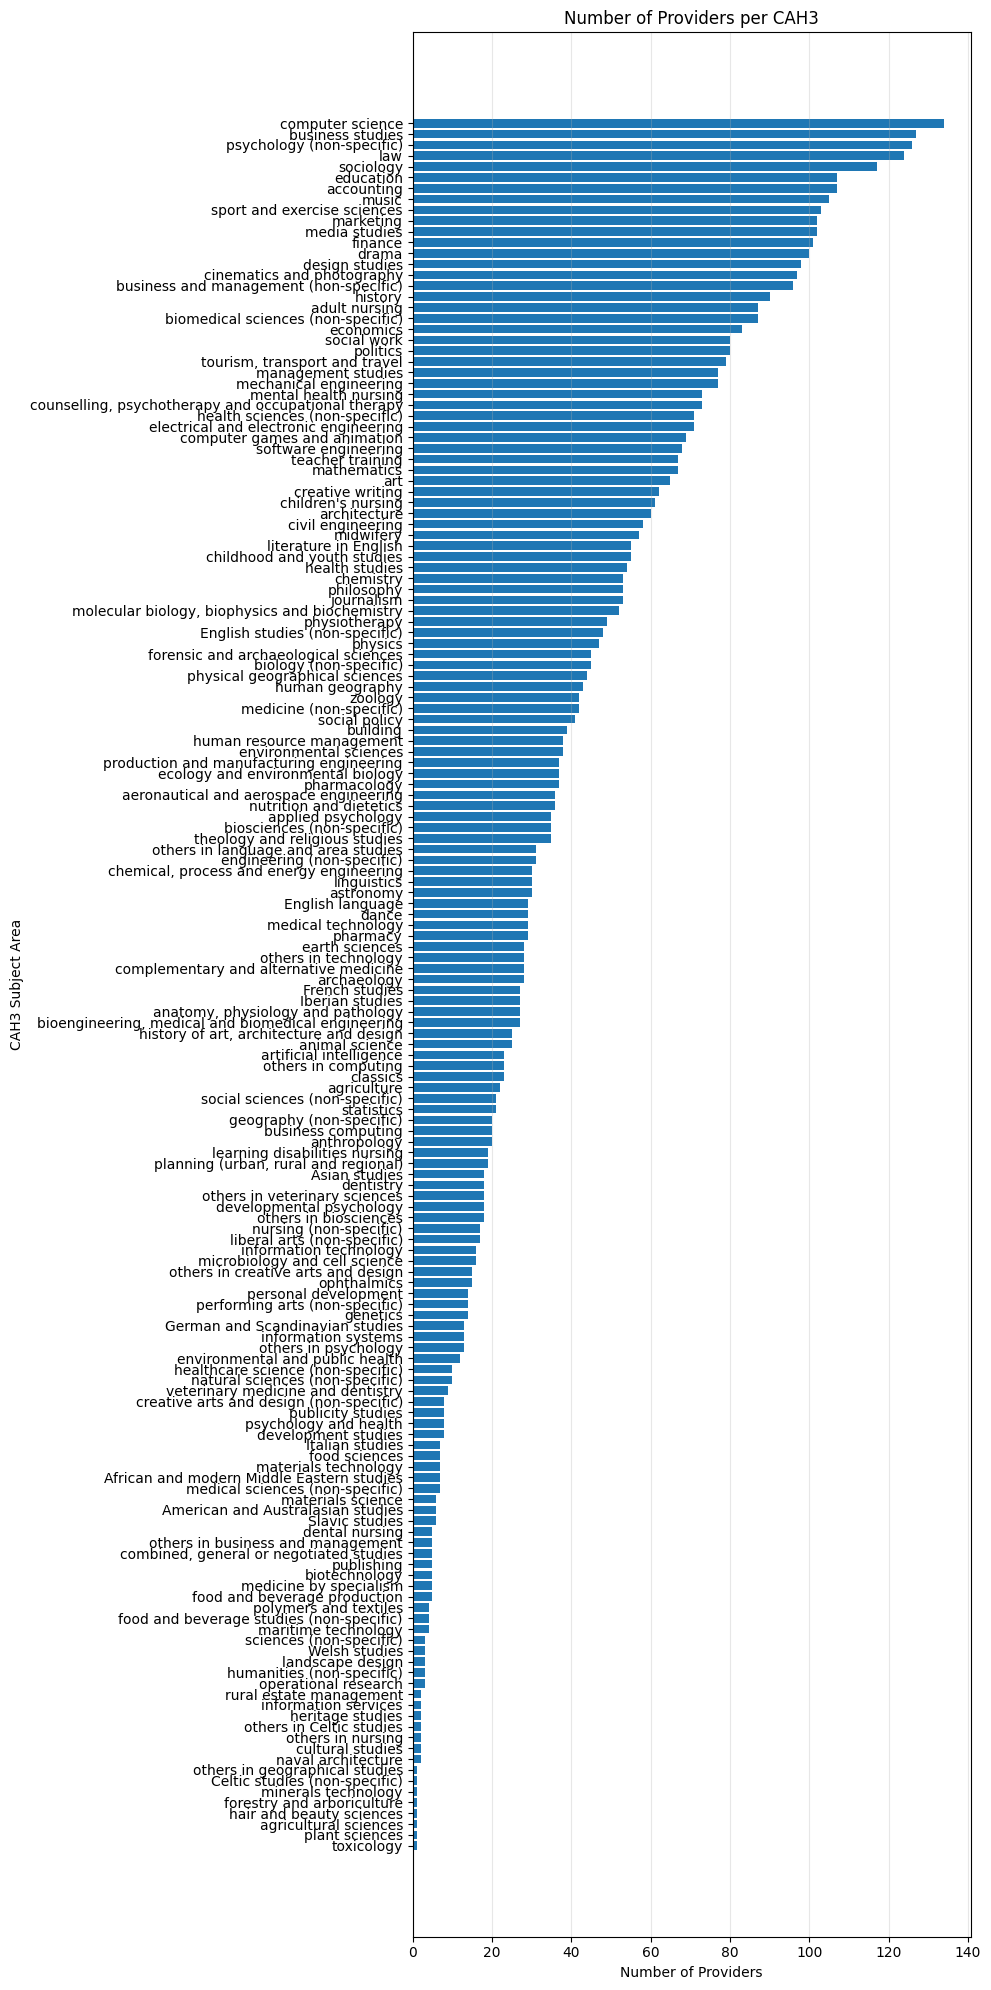

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

# ---- Count number of providers per CAH1 ----
cah1_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        num_providers=("provider", "nunique")
    )
)

# Sort for cleaner plotting
cah1_summary = cah1_summary.sort_values("num_providers", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 20))

plt.barh(
    cah1_summary["cah3_subject"],
    cah1_summary["num_providers"]
)

plt.xlabel("Number of Providers")
plt.ylabel("CAH3 Subject Area")
plt.title("Number of Providers per CAH3")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


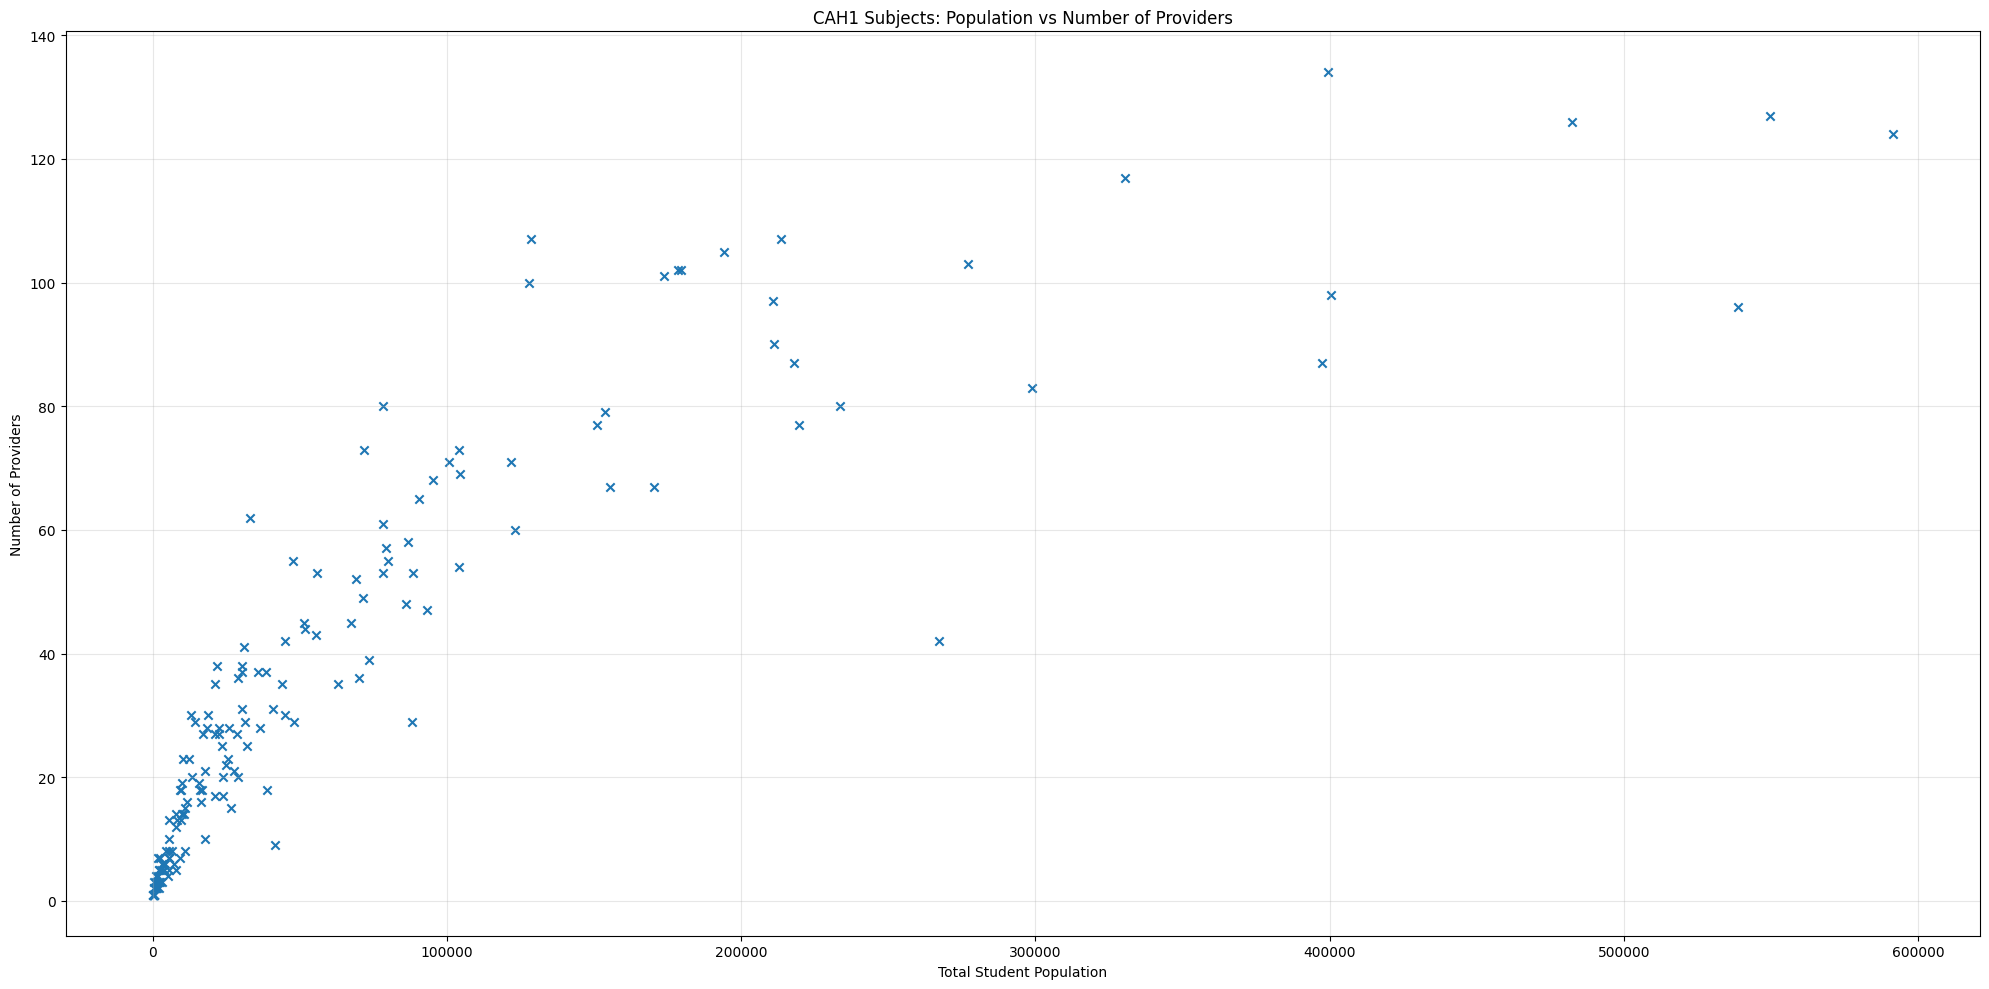

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

# ---- Aggregate by CAH1 subject ----
cah1_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        population=("population", "sum"),
        num_providers=("provider", "nunique")
       
    )
    .sort_values(by="population", ascending=False)
)# Exclude top 2 online providers

# ---- Scatter plot ----
plt.figure(figsize=(20, 10))

plt.scatter(
    cah1_summary["population"],     # X axis: population
    cah1_summary["num_providers"],  # Y axis: provider count

    marker="x"
)
plt.xlabel("Total Student Population")
plt.ylabel("Number of Providers")
plt.title("CAH1 Subjects: Population vs Number of Providers")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


62
Total CAH3 Subjects: 3


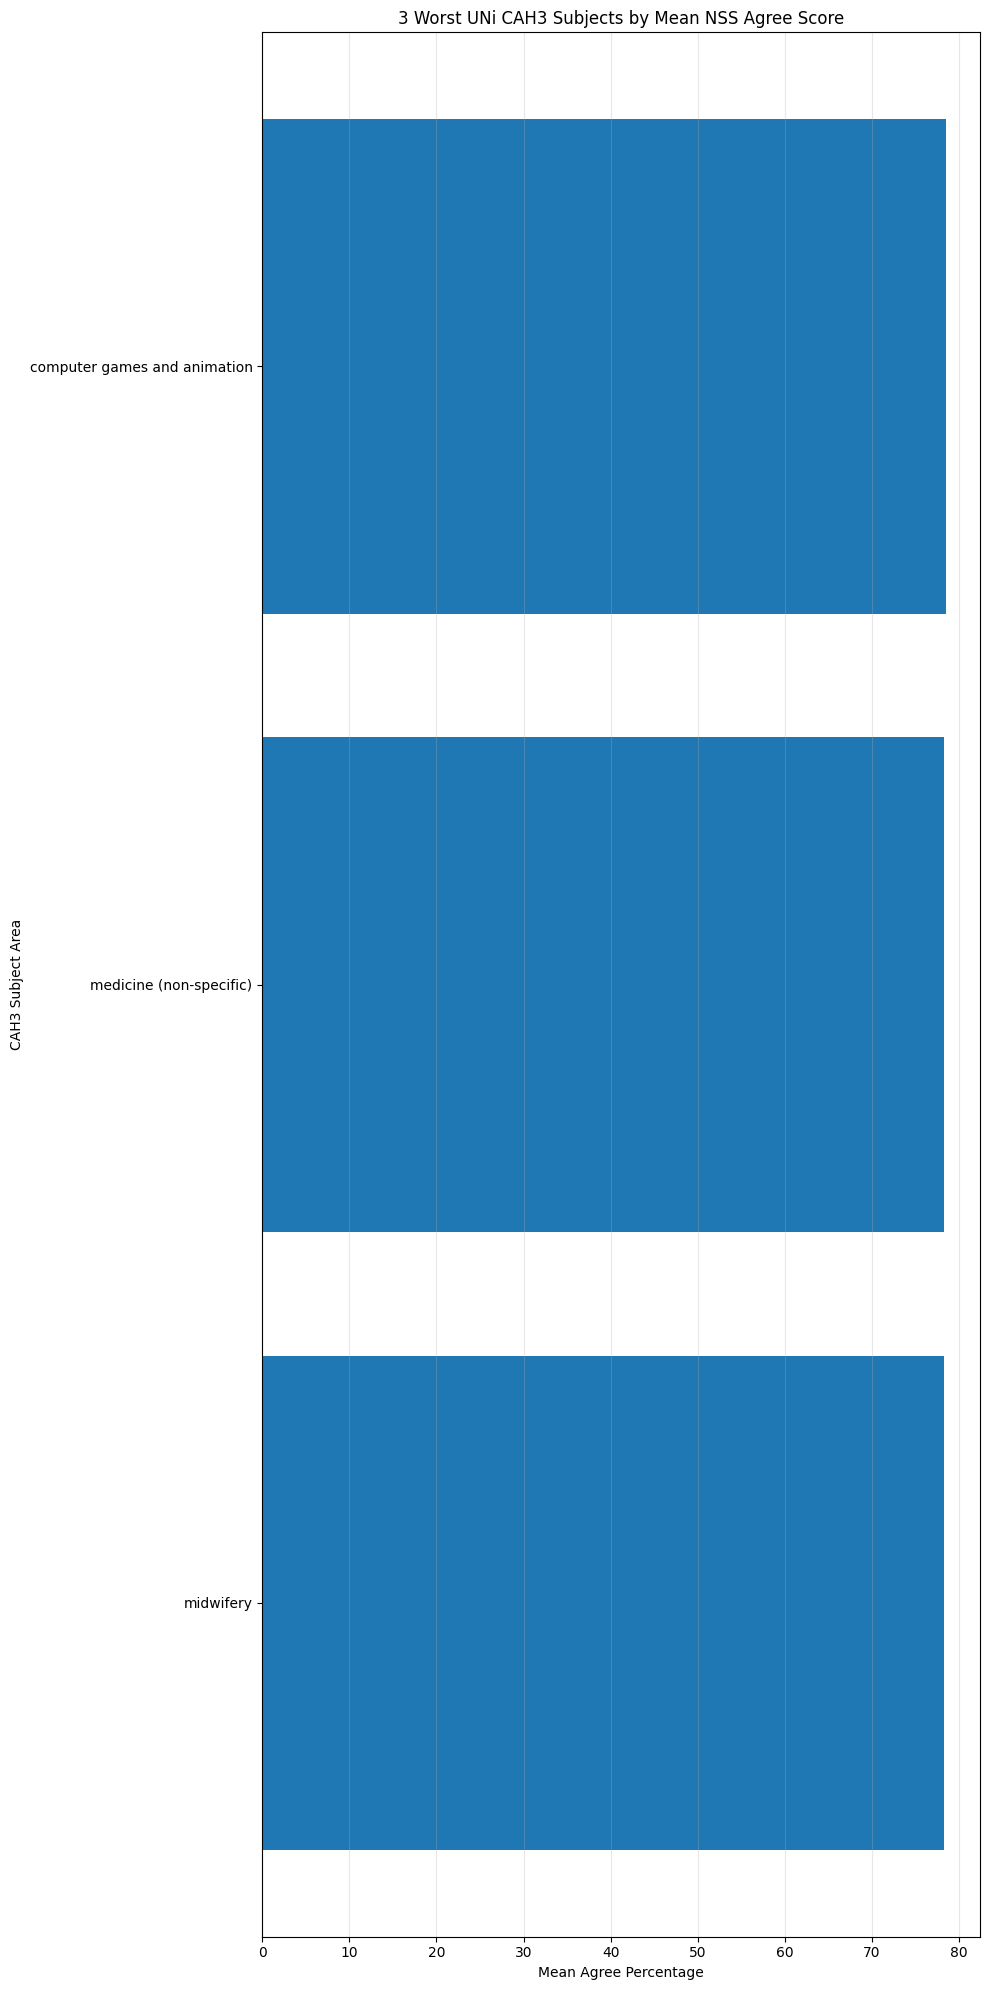

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

df_filtered = df[df["provider"] == "University of Southampton"]

# ---- Aggregate by subject ----
cah1_summary = (
    df_filtered
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        mean_agree_pct=("benchmark", "mean")
    )
)

print(len(cah1_summary))


totalSubjects = (int(len(cah1_summary) *0.05))
print("Total CAH3 Subjects:", totalSubjects)

# ---- 50 WORST subjects ----
worst_50 = (
    cah1_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(totalSubjects)
)

# Sort for plotting
worst_50 = worst_50.sort_values("mean_agree_pct", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 20))

plt.barh(
    worst_50["cah3_subject"],
    worst_50["mean_agree_pct"]
)

plt.xlabel("Mean Agree Percentage")
plt.ylabel("CAH3 Subject Area")
plt.title(f"{totalSubjects} Worst UNi CAH3 Subjects by Mean NSS Agree Score")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


84
Total CAH3 Subjects: 84


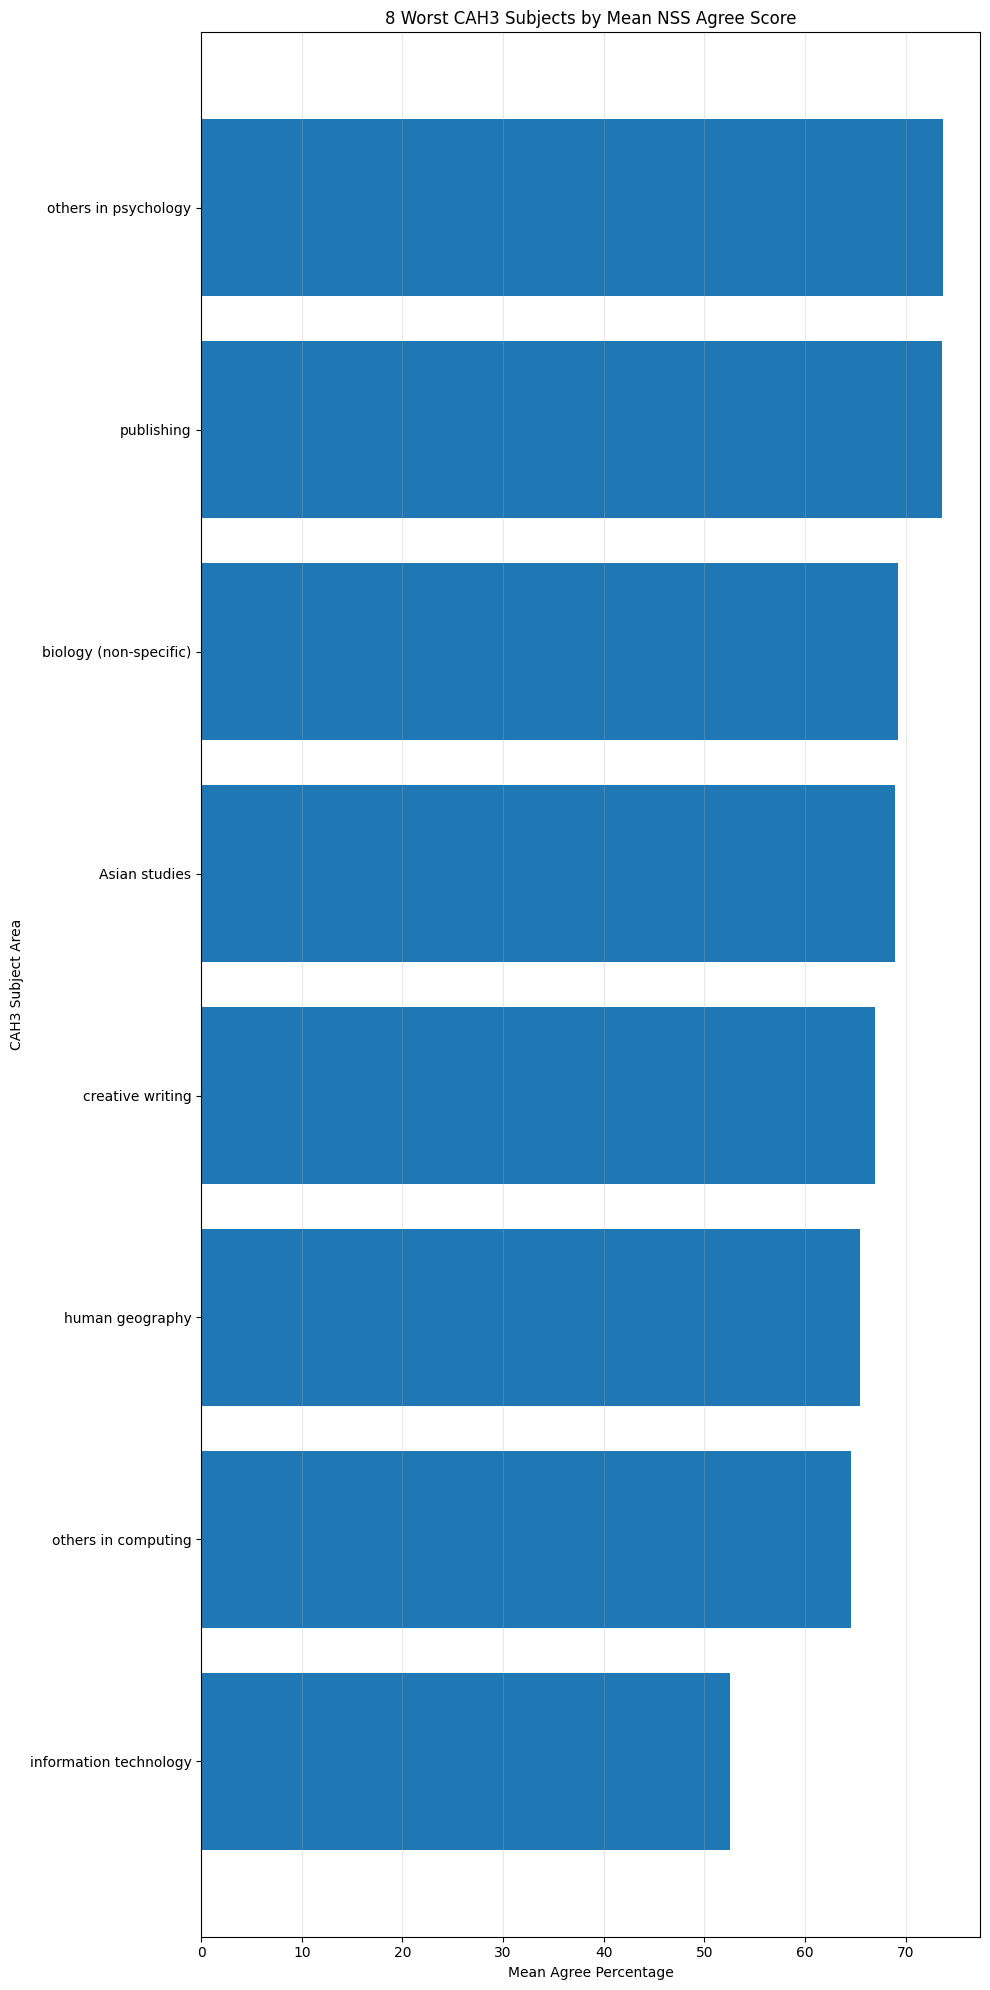

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("FEHE.csv")

# ---- Aggregate by subject ----
cah1_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        mean_agree_pct=("agree_pct", "mean")
    )
)

print(len(cah1_summary))


bottomTen = int(len(cah1_summary) *0.1)


totalSubjects = len(cah1_summary)
print("Total CAH3 Subjects:", totalSubjects)

# ---- 50 WORST subjects ----
worst_50 = (
    cah1_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(bottomTen)
)

# Sort for plotting
worst_50 = worst_50.sort_values("mean_agree_pct", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 20))

plt.barh(
    worst_50["cah3_subject"],
    worst_50["mean_agree_pct"]
)

plt.xlabel("Mean Agree Percentage")
plt.ylabel("CAH3 Subject Area")
plt.title(f"{bottomTen} Worst CAH3 Subjects by Mean NSS Agree Score")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


62
Total CAH3 Subjects: 15


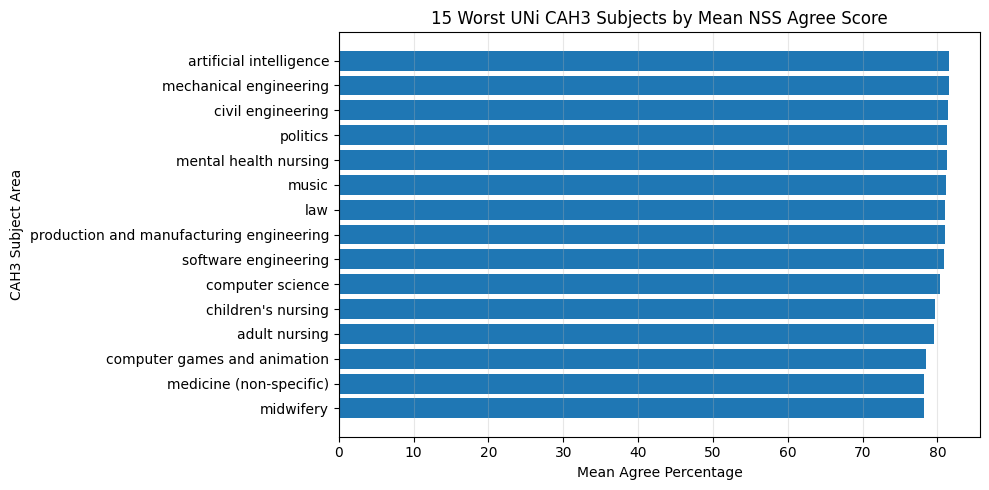

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

# ---- Aggregate by subject ----

df_filtered = df[df["provider"] == "University of Southampton"]
cah1_summary = (
    df_filtered
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        mean_agree_pct=("benchmark", "mean")
    )
)

print(len(cah1_summary))


totalSubjects = (int(len(cah1_summary) *0.25))
print("Total CAH3 Subjects:", totalSubjects)

# ---- 50 WORST subjects ----
worst_50 = (
    cah1_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(totalSubjects)
)

# Sort for plotting
worst_50 = worst_50.sort_values("mean_agree_pct", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 5))

plt.barh(
    worst_50["cah3_subject"],
    worst_50["mean_agree_pct"]
)

plt.xlabel("Mean Agree Percentage")
plt.ylabel("CAH3 Subject Area")
plt.title(f"{totalSubjects} Worst UNi CAH3 Subjects by Mean NSS Agree Score")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# Sort this regarding the student poplaution 
# then cha2 sub subjects
# then popluaitons 
# find the subjects which are diffrent betwqeen the uni and hefe 

In [16]:
#Diffrent siubjects between uni and hefe

import pandas as pd
import matplotlib.pyplot as plt
# Load data
onlyUni = pd.read_csv("onlyUni.csv")


onlyUni = onlyUni[["cah3_code", "cah3_subject"]].drop_duplicates()


listUniSubjects = onlyUni["cah3_subject"].tolist()

print("Total Uni Subjects:", len(listUniSubjects))
print(listUniSubjects)



onlyFEHE= pd.read_csv("FEHE.csv")

onlyFEHE = onlyFEHE[["cah3_code", "cah3_subject"]].drop_duplicates()


listFEHESubjects = onlyFEHE["cah3_subject"].tolist()

print("Total FEHE Subjects:", len(listFEHESubjects))
print(listFEHESubjects)



diffSubjects = set(listUniSubjects) - set(listFEHESubjects)

print("Subjects in Uni but not in FEHE:", len(diffSubjects))
print(diffSubjects)


diffSubjects2 =  set(listFEHESubjects) - set(listUniSubjects)

print("Subjects in FEHE but not in Uni:", len(diffSubjects2))
print(diffSubjects2)

Total Uni Subjects: 159
['mental health nursing', 'biomedical sciences (non-specific)', 'sport and exercise sciences', 'psychology (non-specific)', 'food and beverage studies (non-specific)', 'forensic and archaeological sciences', 'software engineering', 'computer games and animation', 'others in computing', 'sociology', 'law', 'business and management (non-specific)', 'marketing', 'tourism, transport and travel', 'accounting', 'design studies', 'medicine (non-specific)', 'pharmacology', 'nursing (non-specific)', 'adult nursing', 'midwifery', "children's nursing", 'health sciences (non-specific)', 'ophthalmics', 'environmental and public health', 'ecology and environmental biology', 'zoology', 'others in veterinary sciences', 'animal science', 'mechanical engineering', 'civil engineering', 'electrical and electronic engineering', 'computer science', 'artificial intelligence', 'architecture', 'building', 'social work', 'childhood and youth studies', 'business studies', 'management stud

62
Total CAH3 Subjects: 15


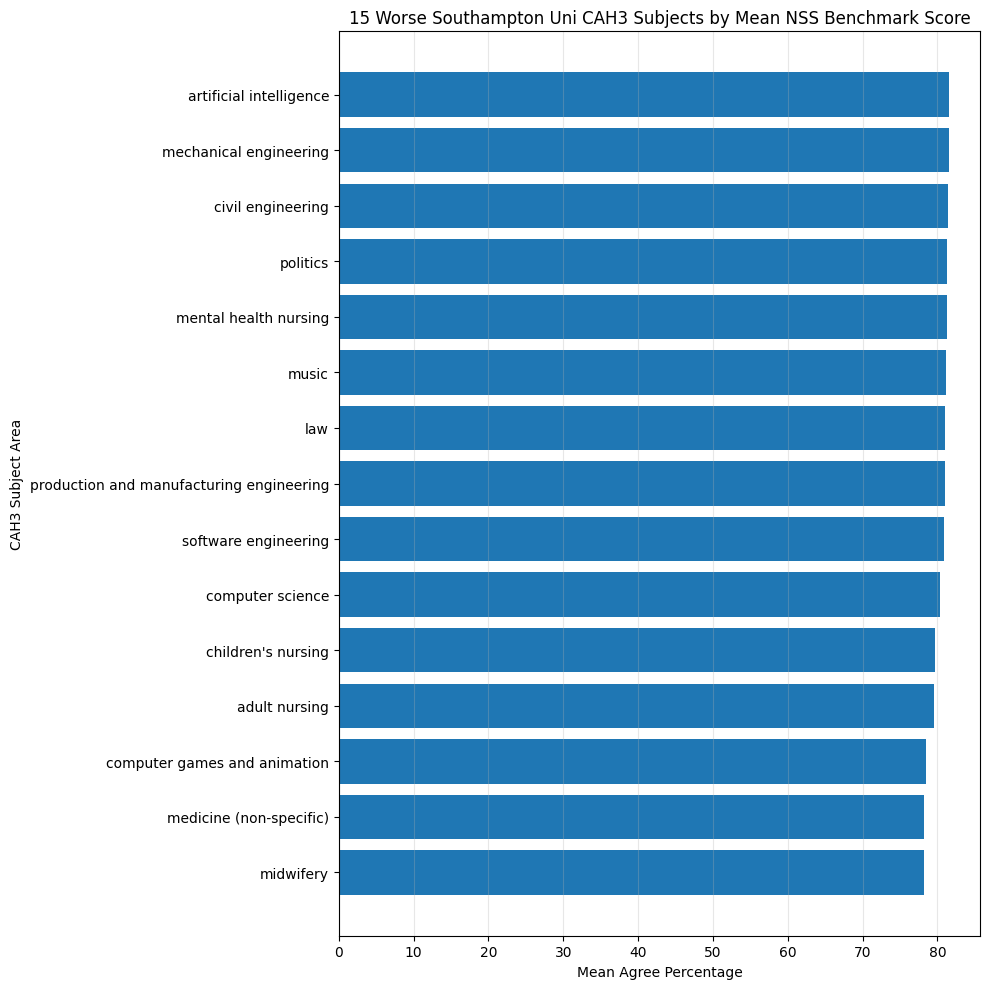

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("onlyUni.csv")
df = df[~df["question"].astype(str).str.contains("Q28: Overall, I am satisfied with the quality of the course.", case=False, na=False)]

df_filtered = df[df["provider"] == "University of Southampton"]
# ---- Aggregate by subject ----
cah1_summary = (
    df_filtered
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        mean_agree_pct=("agree_pct", "mean")
    )
)

print(len(cah1_summary))


totalSubjects = (int(len(cah1_summary) *0.25))
print("Total CAH3 Subjects:", totalSubjects)

# ---- 50 WORST subjects ----x
worst_50 = (
    cah1_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(totalSubjects)
)

# Sort for plotting
worst_50 = worst_50.sort_values("mean_agree_pct", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 10))

plt.barh(
    worst_50["cah3_subject"],
    worst_50["mean_agree_pct"]
)

plt.xlabel("Mean Agree Percentage")
plt.ylabel("CAH3 Subject Area")
plt.title(f"{totalSubjects} Worse Southampton Uni CAH3 Subjects by Mean NSS Benchmark Score")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

           ukprn                   provider cah1_code  \
138720  10007158  University of Southampton     CAH01   
138721  10007158  University of Southampton     CAH01   
138722  10007158  University of Southampton     CAH01   
138723  10007158  University of Southampton     CAH01   
138724  10007158  University of Southampton     CAH01   
...          ...                        ...       ...   
140389  10007158  University of Southampton     CAH26   
140390  10007158  University of Southampton     CAH26   
140391  10007158  University of Southampton     CAH26   
140392  10007158  University of Southampton     CAH26   
140393  10007158  University of Southampton     CAH26   

                                      cah1_subject cah2_code  \
138720                      medicine and dentistry  CAH01-01   
138721                      medicine and dentistry  CAH01-01   
138722                      medicine and dentistry  CAH01-01   
138723                      medicine and dentistry  CAH01-0

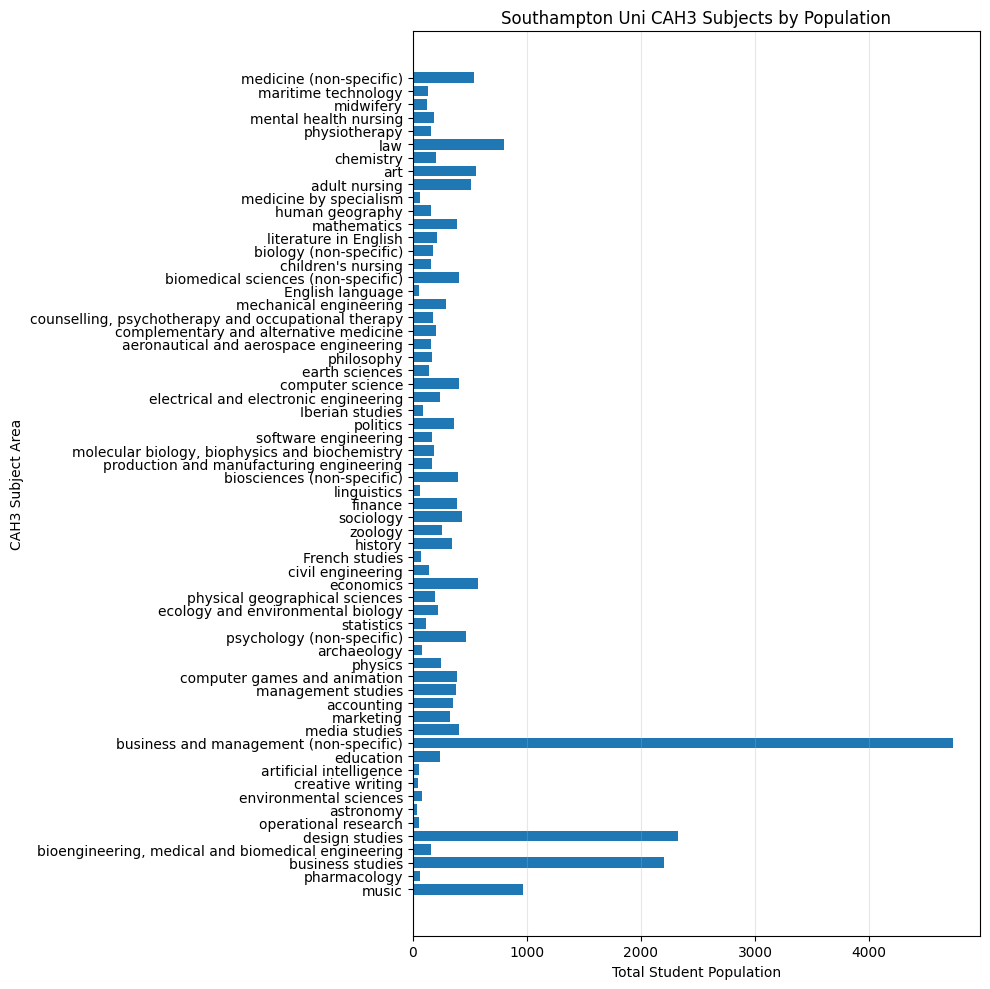

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

df = df[~df["question"].astype(str).str.contains("Q28: Overall, I am satisfied with the quality of the course.", case=False, na=False)]




print(df_filtered)

# ---- Aggregate by subject (CAH3) ----
cah3_summary = (
    df_filtered
    .groupby(["cah3_subject"], as_index=False)
    .agg(mean_agree_pct=("agree_pct", "mean"))
)

print(len(cah3_summary))

totalSubjects = int(len(cah3_summary) )
print("Total CAH3 Subjects:", totalSubjects)

# ---- Worst 10% subjects ----
worst_subjects = (
    cah3_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(totalSubjects)
)

# ---- Population for worst subjects ----
sortedPop = (
    df[df["cah3_subject"].isin(worst_subjects["cah3_subject"])]
    .groupby("cah3_subject", as_index=False)
    .agg(
        sum_unique_population=("population", lambda x: sum(set(x)))
    )
    .sort_values("sum_unique_population", ascending=True)
)

print(sortedPop)

# ---- Plot ----
plt.figure(figsize=(10, 10))

plt.barh(
    sortedPop["cah3_subject"],
    sortedPop["sum_unique_population"]
)

plt.xlabel("Total Student Population")
plt.ylabel("CAH3 Subject Area")
plt.title("Southampton Uni CAH3 Subjects by Population")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


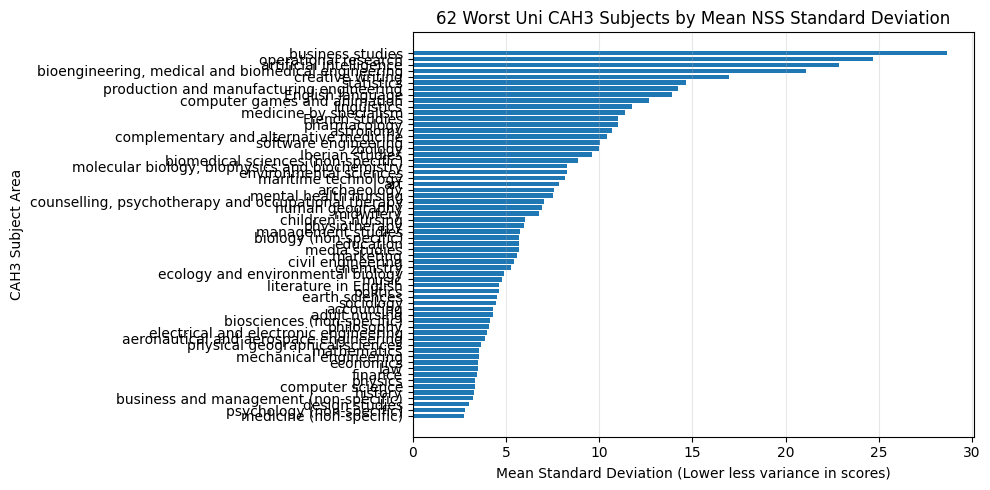

      cah3_code                                       cah3_subject    mean_sd
0   CAH01-01-02                            medicine (non-specific)   2.733333
16  CAH04-01-01                          psychology (non-specific)   2.785185
56  CAH25-01-03                                     design studies   3.033333
38  CAH17-01-01             business and management (non-specific)   3.248148
50  CAH20-01-01                                            history   3.300000
..          ...                                                ...        ...
46  CAH19-01-05                                   creative writing  16.959259
26  CAH10-01-06  bioengineering, medical and biomedical enginee...  21.074074
32  CAH11-01-05                            artificial intelligence  22.881481
21  CAH09-01-02                               operational research  24.674074
39  CAH17-01-02                                   business studies  28.677778

[62 rows x 3 columns]


In [ ]:
import pandas as pd
import pandas as pd

df = pd.read_csv("nss2025.csv")

# ---- Aggregate by subject (MEAN SD) ----

df = df[~df["question"].astype(str).str.contains("Q28: Overall, I am satisfied with the quality of the course.", case=False, na=False)]

df_filtered = df[df["provider"] == "University of Southampton"]

cah3_summary = (
    df_filtered
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(mean_sd=("agree_pct_sd", "mean"))

)

totalSubjects = max(1, int(len(cah3_summary)))

# ---- Worst 10% = HIGHEST SD ----
worst_10pct = (
    cah3_summary
    .sort_values("mean_sd", ascending=True)  # <-- FIX HERE
    .head(totalSubjects)
)


# ---- Plot ----
plt.figure(figsize=(10, 5))

plt.barh(
    worst_10pct["cah3_subject"],
    worst_10pct["mean_sd"]
)

plt.xlabel("Mean Standard Deviation (Lower less variance in scores)")
plt.ylabel("CAH3 Subject Area")
plt.title(f"{totalSubjects} Worst Uni CAH3 Subjects by Mean NSS Standard Deviation")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

print(worst_10pct)


